In [8]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import sklearn
import seaborn as sns
from numpy import where
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE

In [9]:
X = pd.read_csv('truncatedHashtx.1.csv')

#X.drop(X.tail(30000).index,inplace=True)

X.drop(["No."], axis=1, inplace=True)
X = X.head(50000)

In [10]:
# List of the column names with nominal features that should be one-hot encoded
onehot_features = ['Source', 'Destination', 'Protocol', 'Info']

# One-hot encode these features 
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False) # we want a non-sparse matrix for concatenation
encoded = onehot.fit_transform(X[onehot_features])
encoded = pd.DataFrame(encoded) # the output of the encoding is a NumPy array, but we want it as a Pandas DataFrame

# One-hot encoding produces an output with more columns than the input, so we can't just reassign the output to X. 
# There are a few ways to put the encoded features in the original dataframe, but none of them are that elegant, so we'll just drop the old columns and concatenate the new
X.drop(onehot_features, axis=1, inplace=True)
X = pd.concat([X, encoded], axis=1)

#Scale Features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [11]:
#Dimesnionality Reduction 
pca = PCA(2)
X1_pca = pca.fit_transform(X)

In [12]:
clf = OneClassSVM(kernel='rbf', gamma=0.0001, nu=0.03).fit(X1_pca)
pred = clf.predict(X1_pca)

In [13]:
#Find indexes of anoamlous datapoints
anom_index = where(pred==-1)
values = X1_pca[anom_index]
#Find number of anoamlous datapoints
print(len(values))

1413


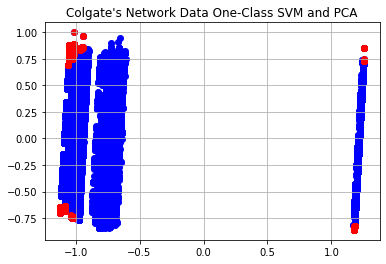

In [14]:
plt.title("Colgate's Network Data One-Class SVM and PCA")
plt.scatter(X1_pca[:,0], X1_pca[:,1], color='b')
plt.scatter(values[:,0], values[:,1], color='r')
plt.grid(True)
plt.show()

In [15]:
#Dimensionality Reduction 
tsne = TSNE(2)
X2_tsne = tsne.fit_transform(X)

In [16]:
clf = OneClassSVM(kernel='rbf', gamma=0.0001, nu=0.03).fit(X2_tsne)
pred1 = clf.predict(X2_tsne)

In [17]:
#Find indexes of anomalous datapoints
anom_index1 = where(pred1==-1)
values1 = X2_tsne[anom_index1]
#Find number of anoamlous datapoints
print(len(values1))

1497


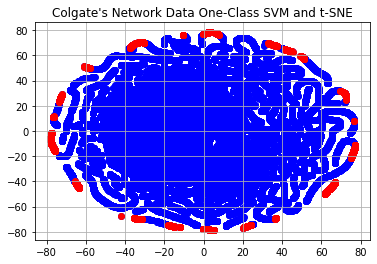

In [18]:
plt.title("Colgate's Network Data One-Class SVM and t-SNE")
plt.scatter(X2_tsne[:,0], X2_tsne[:,1], color='b')
plt.scatter(values1[:,0], values1[:,1], color='r')
plt.grid(True)
plt.show()